In [75]:
#-------------------------------------------------
# Sean Carda
# ECE 253 - Image Processing
# Homework 3 - Problem 3
# 11/21/21
#-------------------------------------------------

#-------------------------------------------------
# Global Imports.
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#-------------------------------------------------
#-----------------
# Prep work.
#-----------------

# Define the transform from image data to tensor data.
transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Answer question ii.
print('Question ii\n-----------')
print('Here, we are normalizing the images. However, we are not necessarily normalizing the images\
      \ndirectly. We are converting the images in the dataset to Tensors, then we are normalizing\
      \nthe Tensors to [-1, 1].')

# Define the batch size.
batch_size = 4

# Define the training set for the classifier.
trainset = torchvision.datasets.CIFAR10(root='./data', 
                                        train=True,
                                        download=False,
                                        transform=transform)


# Answer question i.
print('\nQuestion i\n-----------')
print('There are ' + str(len(trainset)) + ' training images in the CIFAR10 dataset.')
print('Since we are using a batch size of ' + str(batch_size) + ', we have ' + 
      str((int(len(trainset) / batch_size))) + ' batches for training.')


# Load the training set for the classifier.
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=2)

# Define the testing set for the classifier.
testset = torchvision.datasets.CIFAR10(root='./data', 
                                        train=False,
                                        download=False,
                                        transform=transform)


# Print how many testing images there are.
print('There are ' + str(len(testset)) + ' testing images in the CIFAR10 dataset.')


# Load the testing set for the classifier.
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         num_workers=2)

# Define the class identifiers for the classifier.
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Question ii
-----------
Here, we are normalizing the images. However, we are not necessarily normalizing the images      
directly. We are converting the images in the dataset to Tensors, then we are normalizing      
the Tensors to [-1, 1].

Question i
-----------
There are 50000 training images in the CIFAR10 dataset.
Since we are using a batch size of 4, we have 12500 batches for training.
There are 10000 testing images in the CIFAR10 dataset.


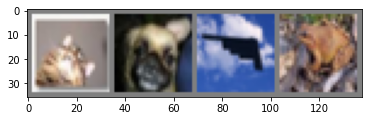

  cat   dog plane  frog


In [14]:
#-----------------
# Showing some
# traning images.
#-----------------

# Define an function to show a specified image.
def imshow(img):
    # Unnormalize the image.
    img = img / 2 + 0.5
    
    # Convert the Tensor to a numpy array.
    npimg = img.numpy()
    
    # Show the image.
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Grab some random training images.
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Show the random images.
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))


In [16]:
#-----------------
# Define a CNN
#-----------------

# Define a new class which will instantiate a CNN module.
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# Define a new CNN from our specified class.
net = Net()
print('CNN creation successful!')


CNN creation successful!


In [17]:
#-----------------
# Define a loss
# function and
# optimizer.
#-----------------

# Define our loss criterion.
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
print('Criterion established!')


Criterion established!


In [60]:
#-----------------
# Train the
# network.
#-----------------

print('Starting to train...')
loss_data = []
for epoch in range(2):
    # Instantiate our current loss.
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs where the data is a tuple of input images and labels.
        inputs, labels = data
        
        # Zero the parameter gradients.
        optimizer.zero_grad()
        
        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Print the current statistics for the classification.
        running_loss += loss.item()
        if i % 2000 == 1999:
            loss_data.append(running_loss / 2000)
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Training!')


Starting to train...


/opt/conda/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] loss: 2.247
[1,  4000] loss: 1.908
[1,  6000] loss: 1.696
[1,  8000] loss: 1.601
[1, 10000] loss: 1.498
[1, 12000] loss: 1.471
[2,  2000] loss: 1.400
[2,  4000] loss: 1.381
[2,  6000] loss: 1.342
[2,  8000] loss: 1.340
[2, 10000] loss: 1.297
[2, 12000] loss: 1.277
Finished Training!


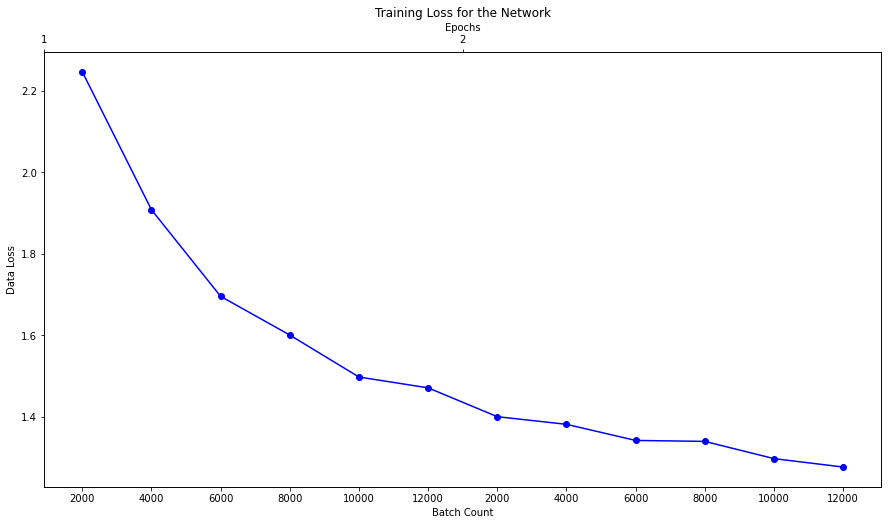

In [61]:
#-------------------
# Plot the data 
# loss.
#-------------------

# Question iii.
batch_count = [2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 22000, 24000]
batch_labels = [2000, 4000, 6000, 8000, 10000, 12000, 2000, 4000, 6000, 8000, 10000, 12000]
batch = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
epoch_labels = [0, 2]

figure, axes = plt.subplots()
axes.set_xticks(batch)
axes.set_xticklabels(batch_labels)
axes.set_xlabel('Batch Count')
axes.set_ylabel('Data Loss')

epoch_axis = axes.twiny()
epoch_axis.set_xlim(0, 4)
epoch_axis.set_xticks(epoch_labels)
epoch_axis.set_xticklabels([1, 2])
epoch_axis.set_xlabel('Epochs')

axes.plot(batch, loss_data, '-bo')
plt.title('Training Loss for the Network')
plt.show()
plt.rcParams['figure.figsize'] = [15, 8]


In [62]:
#-----------------
# Save the
# trained model.
#-----------------
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


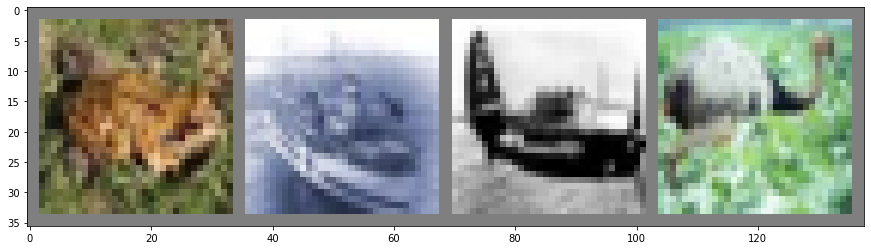

GroundTruth:   frog  ship plane  bird
Predicted:   frog  ship truck plane


In [114]:
#-----------------
# Test the
# network on the
# loaded test
# data.
#-----------------

# Instantiate a iterator for the loaded test data.
dataiter = iter(testloader)
images, labels = dataiter.next()

# Print some of the test images.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Load a CNN with the trained model.
net = Net()
net.load_state_dict(torch.load(PATH))

# Generate the outputs.
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))


In [ ]:
# Calculate the accuracy of the network.
correct = 0
total = 0
print('Calculating the accuracy of the network...')
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


In [15]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

print('Calculating accurate predictions per label...')
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


print('Printing accuracy for each label...')
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))
    

Calculating accurate predictions per label...
Printing accuracy for each label...
Accuracy for class plane is: 72.4 %
Accuracy for class car   is: 60.8 %
Accuracy for class bird  is: 24.7 %
Accuracy for class cat   is: 42.7 %
Accuracy for class deer  is: 57.1 %
Accuracy for class dog   is: 14.1 %
Accuracy for class frog  is: 62.0 %
Accuracy for class horse is: 62.4 %
Accuracy for class ship  is: 65.4 %
Accuracy for class truck is: 72.1 %


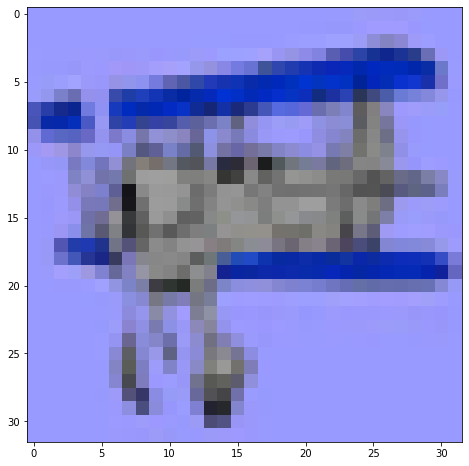

Feature Map Layer 1


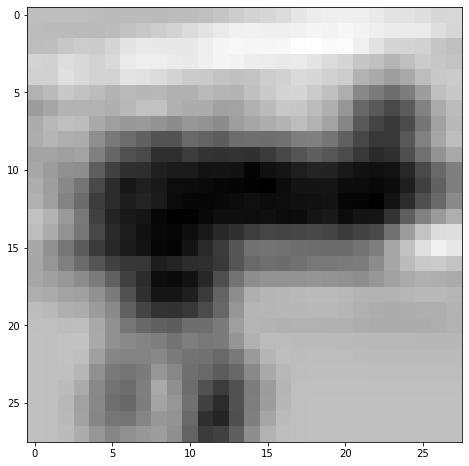

Feature Map Layer 2


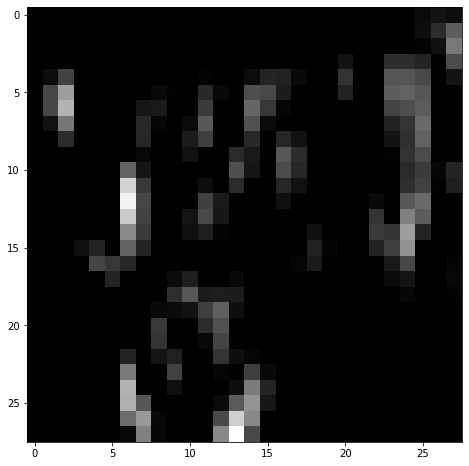

Feature Map Layer 3


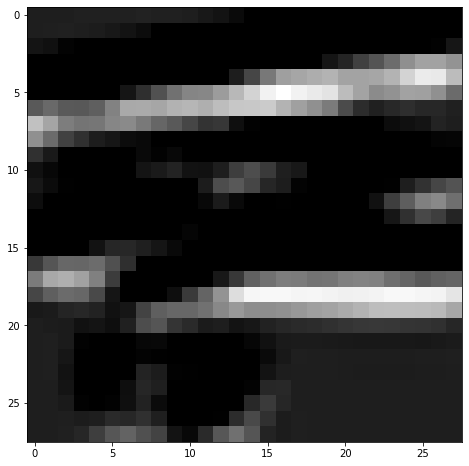

Feature Map Layer 4


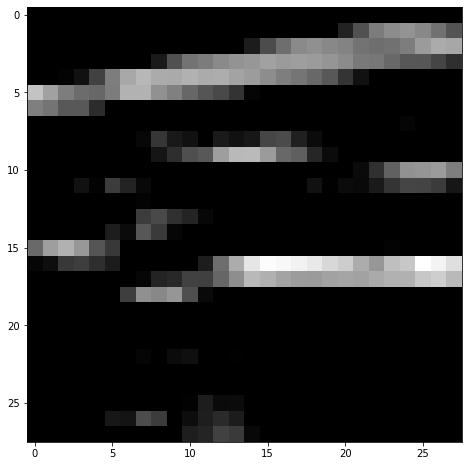

Feature Map Layer 5


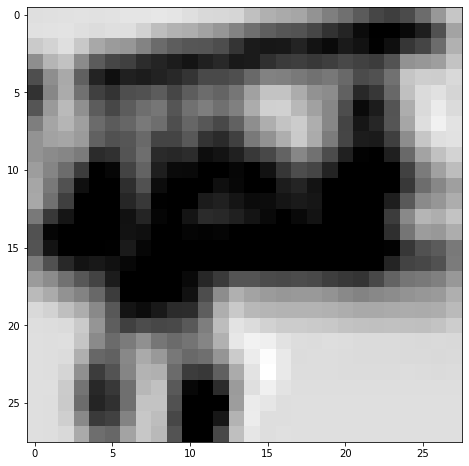

Feature Map Layer 6


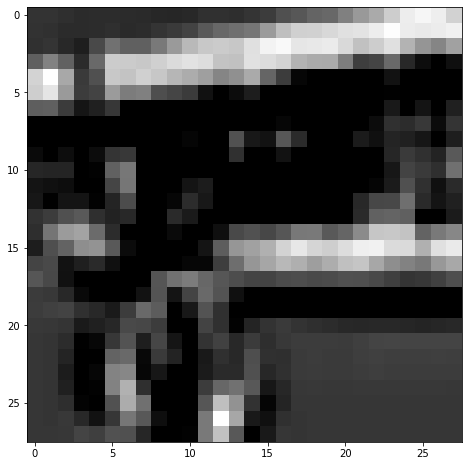

In [130]:
# Instantiate a new loader which will only load one image at a time.
single_loader = torch.utils.data.DataLoader(trainset,
                                          batch_size=1,
                                          shuffle=True,
                                          num_workers=2)

# Define a imshow method for a single layer in the Conv2 output.
def imshow_layer(img):
    # Unnormalize the image.
    img = img / 2 + 0.5
    
    # Convert the Tensor to a numpy array.
    npimg = img.numpy()
    
    # Show the image.
    plt.imshow(npimg, cmap='gray')
    plt.show()

# Since the data is shuffled, grab the first random image.
for index, data in enumerate(single_loader, 0):
    temp = data[index]    
    imshow(torchvision.utils.make_grid(temp))
    out = F.relu(net.conv1(temp))
    break

# For every layer in the Tensor, plot it as a grayscale image.
[blank, layers, r, c] = out.shape
for i in range(0, layers):
    print('Feature Map Layer ' + str(i + 1))
    imshow_layer(out[0, i, :, :].detach())
